In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

In [3]:
deliveries = pd.read_csv(r"C:\Users\khush\Downloads\IPL_dataset\deliveries.csv")
matches = pd.read_csv(r"C:\Users\khush\Downloads\IPL_dataset\matches.csv")

In [4]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [5]:
matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [6]:
matches.shape

(1095, 20)

In [7]:
deliveries.shape

(260920, 17)

In [9]:
top_batters = deliveries.groupby('batter')['batsman_runs'].sum().sort_values(ascending = False).head(10)
print(top_batters)

batter
V Kohli           8014
S Dhawan          6769
RG Sharma         6630
DA Warner         6567
SK Raina          5536
MS Dhoni          5243
AB de Villiers    5181
CH Gayle          4997
RV Uthappa        4954
KD Karthik        4843
Name: batsman_runs, dtype: int64


In [10]:
wickets = deliveries[deliveries['is_wicket'] == 1]
top_bowlers = wickets.groupby('bowler').count()['is_wicket'].sort_values(ascending = False).head(10)
print(top_bowlers)

bowler
YS Chahal     213
DJ Bravo      207
PP Chawla     201
SP Narine     200
R Ashwin      198
B Kumar       195
SL Malinga    188
A Mishra      183
JJ Bumrah     182
RA Jadeja     169
Name: is_wicket, dtype: int64


In [22]:
matches['team1'].replace({'Rising Pune Supergiants':'Rising Pune Supergiant'},inplace=True)
matches['team2'].replace({'Rising Pune Supergiants':'Rising Pune Supergiant'},inplace=True)
matches['toss_winner'].replace({'Rising Pune Supergiants':'Rising Pune Supergiant'},inplace=True)
matches['winner'].replace({'Rising Pune Supergiants':'Rising Pune Supergiant'},inplace=True)

In [24]:
matches['team1'].replace({'Royal Challengers Bengaluru':'Royal Challengers Bangalore'},inplace=True)
matches['team2'].replace({'Royal Challengers Bengaluru':'Royal Challengers Bangalore'},inplace=True)
matches['toss_winner'].replace({'Royal Challengers Bengaluru':'Royal Challengers Bangalore'},inplace=True)
matches['winner'].replace({'Royal Challengers Bengaluru':'Royal Challengers Bangalore'},inplace=True)

In [26]:
top_batters = deliveries.groupby('batter')['batsman_runs'].sum().sort_values(ascending = False).head(10)


In [28]:
super_over_matches = matches[matches['super_over'] == 'Y']
print(super_over_matches[['id','team1','team2','winner']])

          id                        team1                        team2  \
66    392190        Kolkata Knight Riders             Rajasthan Royals   
130   419121          Chennai Super Kings              Kings XI Punjab   
328   598004          Sunrisers Hyderabad  Royal Challengers Bangalore   
342   598017  Royal Challengers Bangalore             Delhi Daredevils   
416   729315        Kolkata Knight Riders             Rajasthan Royals   
475   829741             Rajasthan Royals              Kings XI Punjab   
610  1082625                Gujarat Lions               Mumbai Indians   
705  1175365        Kolkata Knight Riders               Delhi Capitals   
746  1178426               Mumbai Indians          Sunrisers Hyderabad   
757  1216493               Delhi Capitals              Kings XI Punjab   
765  1216547  Royal Challengers Bangalore               Mumbai Indians   
790  1216512        Kolkata Knight Riders          Sunrisers Hyderabad   
791  1216517               Mumbai Indi

In [30]:
matches['winner'].value_counts().head(10)

winner
Mumbai Indians                 144
Chennai Super Kings            138
Kolkata Knight Riders          131
Royal Challengers Bangalore    123
Rajasthan Royals               112
Kings XI Punjab                 88
Sunrisers Hyderabad             88
Delhi Daredevils                67
Delhi Capitals                  48
Deccan Chargers                 29
Name: count, dtype: int64

In [32]:
deliveries['batting_team'].value_counts()

batting_team
Mumbai Indians                 31437
Kolkata Knight Riders          29514
Chennai Super Kings            28651
Royal Challengers Bangalore    28205
Rajasthan Royals               26242
Kings XI Punjab                22646
Sunrisers Hyderabad            21843
Delhi Daredevils               18786
Delhi Capitals                 10946
Deccan Chargers                 9034
Punjab Kings                    6833
Gujarat Titans                  5494
Pune Warriors                   5443
Lucknow Super Giants            5400
Gujarat Lions                   3566
Rising Pune Supergiant          1900
Royal Challengers Bengaluru     1818
Kochi Tuskers Kerala            1582
Rising Pune Supergiants         1580
Name: count, dtype: int64

#### Data Cleaning

In [35]:
matches['city'].isna().sum()

51

In [37]:
matches['method'].value_counts()

method
D/L    21
Name: count, dtype: int64

In [41]:
matches['city'].fillna('Unknown',inplace=True)
matches['method'].fillna('Non D/L',inplace=True)

#### Success Rate of Team

In [44]:
def random_colors(no_of_colors):
    return ['#'+''.join([np.random.choice(list('0123456789ABCDEF')) for _ in range(6)]) for _ in range(no_of_colors)]

In [46]:
random_colors(6)

['#87AB3F', '#F03351', '#FC3B33', '#93FE63', '#967B5B', '#BDBD41']

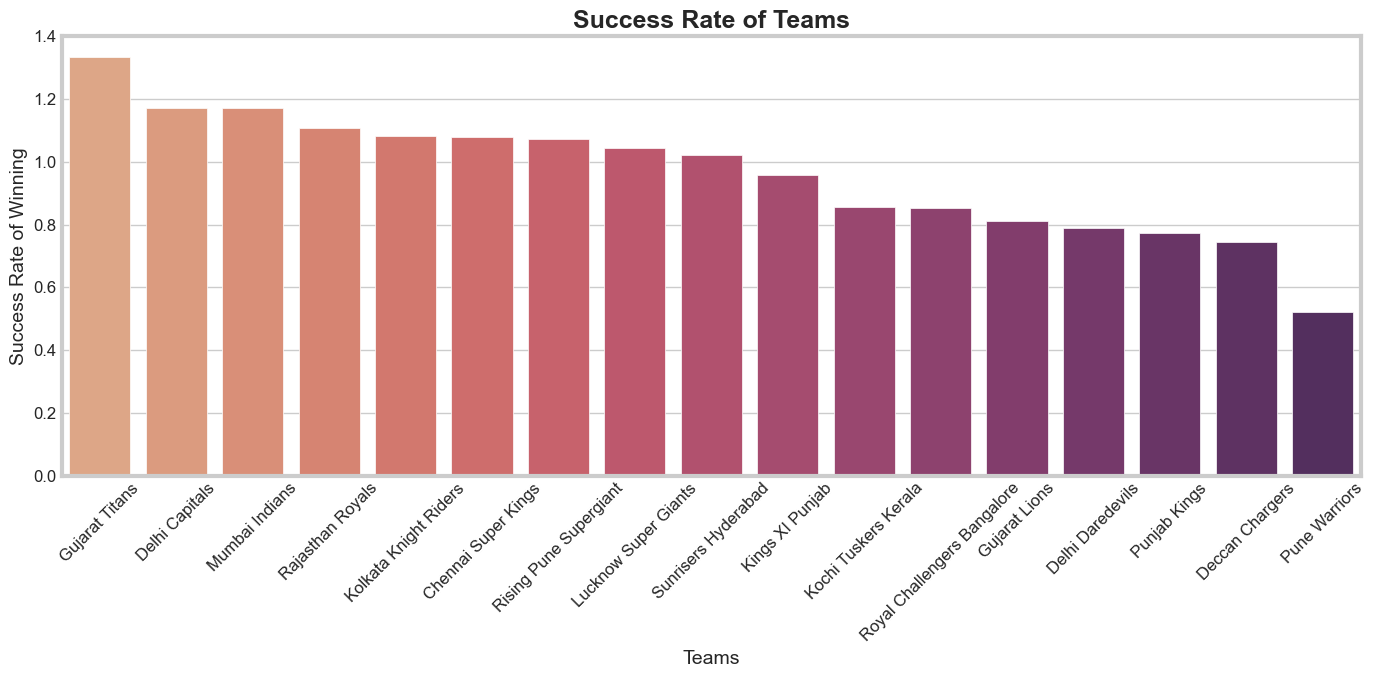

In [48]:
success_ratio = matches.groupby('winner').count()['id'] / matches.groupby('team1').count()['id']
success_ratio_desc = success_ratio.sort_values(ascending = False)

sns.set_style("whitegrid")
plt.figure(figsize=(14,7))

# Prepare DataFrame for seaborn barplot with hue
df = pd.DataFrame({
    'Team': success_ratio_desc.index,
    'Success_Rate': success_ratio_desc.values
})

# Create palette
palette = sns.color_palette("flare", len(success_ratio_desc))

# Plot with hue set to Team and disable legend
sns.barplot(data=df, x='Team', y='Success_Rate', hue='Team', palette=palette, dodge=False, legend=False)

plt.title('Success Rate of Teams', fontsize=18, fontweight='bold')
plt.xlabel('Teams', fontsize=14)
plt.ylabel('Success Rate of Winning', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

#### Most Titles Wins

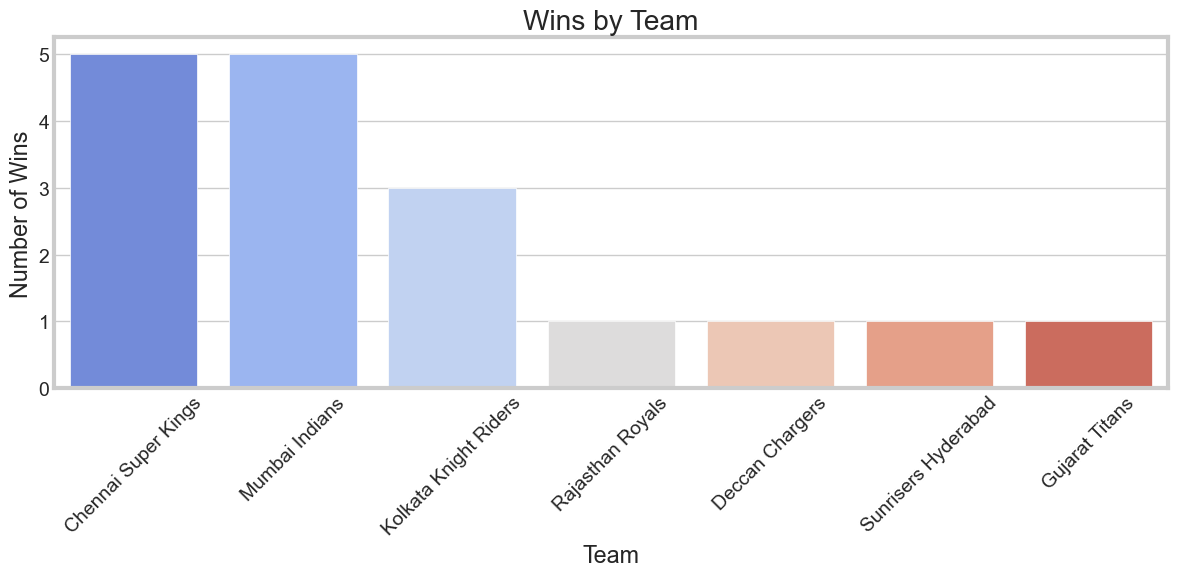

In [51]:
winner_counts = matches.groupby('season')[['season','winner']].tail(1)['winner'].value_counts()


df = pd.DataFrame({
    'Team': winner_counts.index,
    'Wins': winner_counts.values
})

plt.figure(figsize=(12,6))

# Choose the color palette you like
palette = sns.color_palette("coolwarm", len(df))

# Use hue=Team and disable legend
sns.barplot(x='Team', y='Wins', data=df, hue='Team', palette=palette, dodge=False, legend=False)

plt.title('Wins by Team')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Top 10 Players with Most Runs

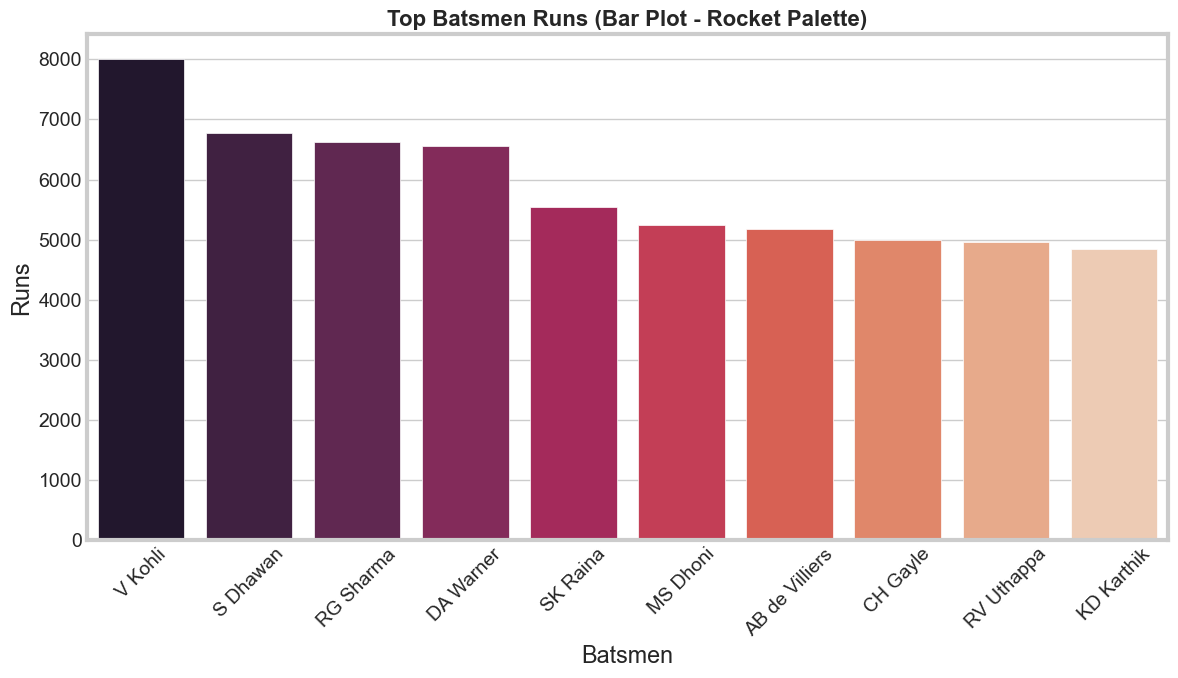

In [54]:
batting_top = deliveries.groupby('batter')['batsman_runs'].sum().reset_index(name = 'Runs')

top_batsmen = batting_top.sort_values(by='Runs', ascending=False).head(10)

plt.figure(figsize=(12,7))
palette = sns.color_palette("rocket", len(top_batsmen))

sns.barplot(x='batter', y='Runs', data=top_batsmen,
            hue='batter', palette=palette, dodge=False, legend=False)

plt.title('Top Batsmen Runs (Bar Plot - Rocket Palette)', fontsize=16, fontweight='bold')
plt.xlabel('Batsmen')
plt.ylabel('Runs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Top 10 Best Performances in a Match

In [57]:
batting_ings = deliveries.groupby(['match_id', 'batter'])['batsman_runs'].sum().reset_index(name='Innings Runs')
top_batsmen_scores = batting_ings.sort_values(by='Innings Runs',ascending=False)[:10]

In [59]:
batsman_ball_faced = deliveries.groupby(['match_id', 'batter'])['batsman_runs'].count().reset_index(name='Balls Faced')

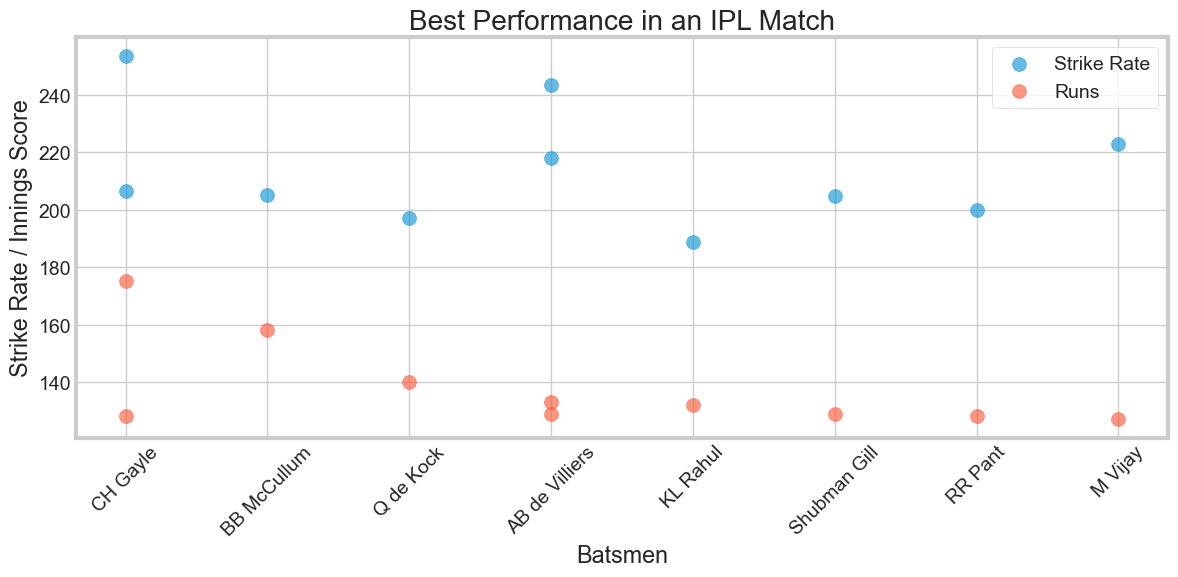

In [61]:
batsmen_performance = pd.merge(top_batsmen_scores,batsman_ball_faced,how='inner', on=['match_id','batter'])
batsmen_performance['Strike Rate for Match'] = np.round(batsmen_performance['Innings Runs']*100/batsmen_performance['Balls Faced'],2)
batsmen_performance

plt.figure(figsize=(12,6))
plt.scatter(batsmen_performance['batter'],batsmen_performance['Strike Rate for Match'], label='Strike Rate',s=100, alpha=0.6)
plt.scatter(batsmen_performance['batter'],batsmen_performance['Innings Runs'], label='Runs',s=100, alpha=0.6)
plt.title('Best Performance in an IPL Match')
plt.xlabel('Batsmen')
plt.ylabel('Strike Rate / Innings Score')
plt.legend()
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

#### Top 10 Bowlers till 2020

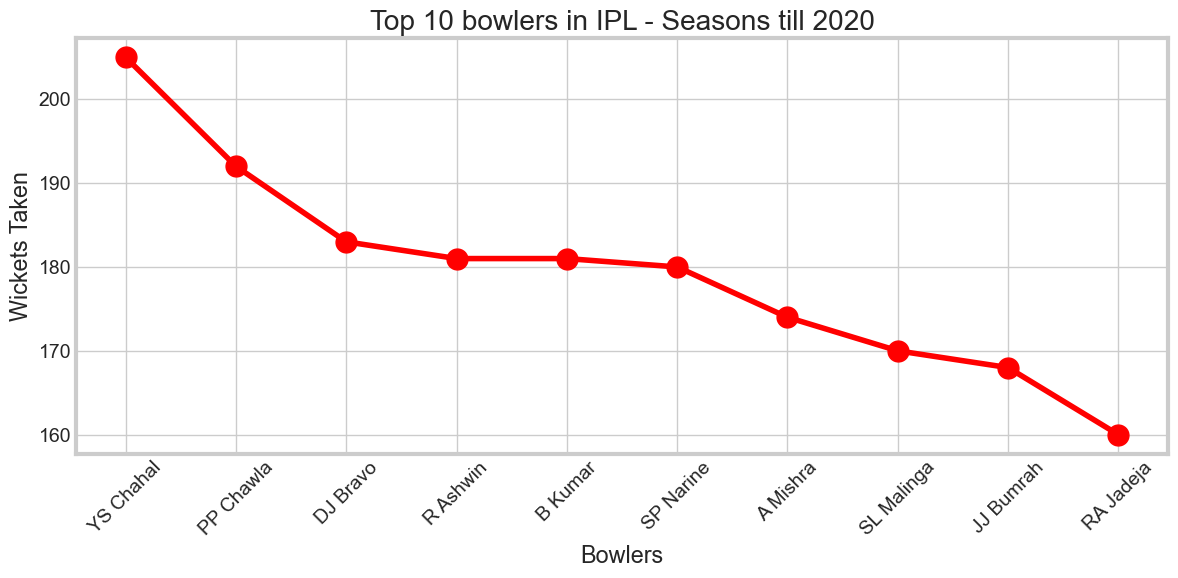

In [64]:
bowling_wickets = deliveries[deliveries['dismissal_kind'] != 'run out']
top_bowlers = bowling_wickets.groupby('bowler')['dismissal_kind'].count().reset_index(
    name='Wickets').sort_values(by='Wickets',ascending=False)[:10]

plt.figure(figsize=(12,6))
plt.plot(top_bowlers['bowler'],top_bowlers['Wickets'], marker= 'o',color='red',ms=15)
plt.title('Top 10 bowlers in IPL - Seasons till 2020')
plt.xlabel('Bowlers')
plt.ylabel('Wickets Taken')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

#### Top 10 Bowling Performances till 2020

In [67]:
match_bowling_top = bowling_wickets.groupby(['match_id','bowler'])['dismissal_kind'].count().reset_index(
    name='Wickets').sort_values(by='Wickets',ascending=False)[:10]

In [69]:
match_bowler_runs = deliveries.groupby(['match_id','bowler'])['total_runs'].sum().reset_index(name='Runs Conceded')

In [71]:
match_bowler_performance = pd.merge(match_bowler_runs,match_bowling_top,how='inner', on =['match_id','bowler'])

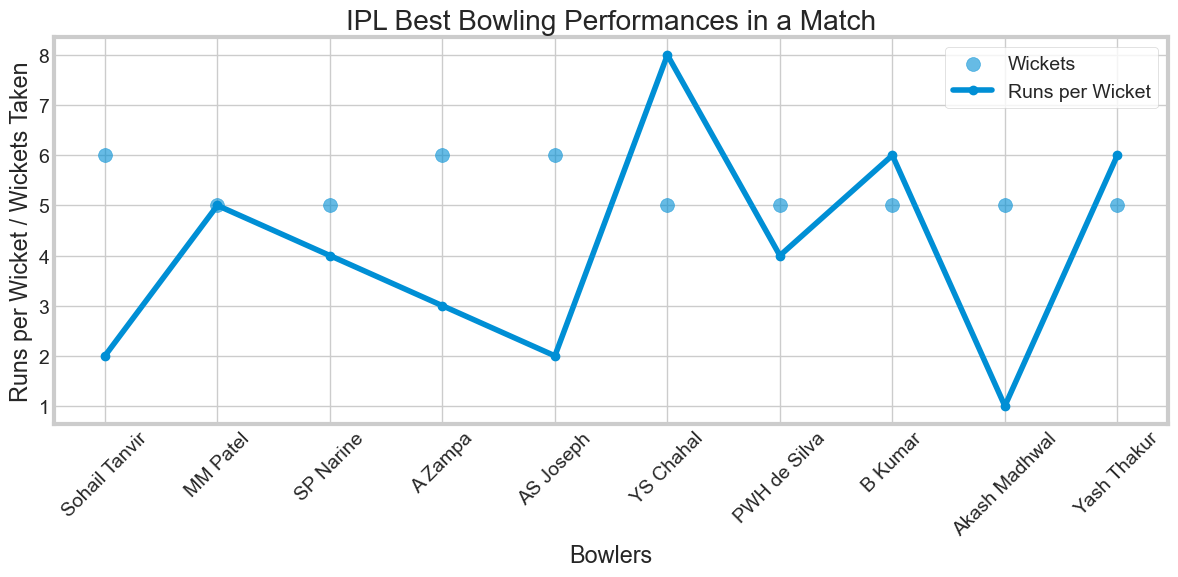

In [73]:
match_bowler_performance['Runs per Wicket'] = np.round(match_bowler_performance['Runs Conceded']/match_bowler_performance['Wickets'],0)

plt.figure(figsize=(12,6))
plt.scatter(match_bowler_performance['bowler'],match_bowler_performance['Wickets'],label='Wickets',s=100,alpha=0.6)
plt.plot(match_bowler_performance['bowler'],match_bowler_performance['Runs per Wicket'],marker='o',label='Runs per Wicket')
plt.title('IPL Best Bowling Performances in a Match')
plt.xlabel('Bowlers')
plt.ylabel('Runs per Wicket / Wickets Taken')
plt.legend()
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

#### Top 10 Cities by Number of Matches

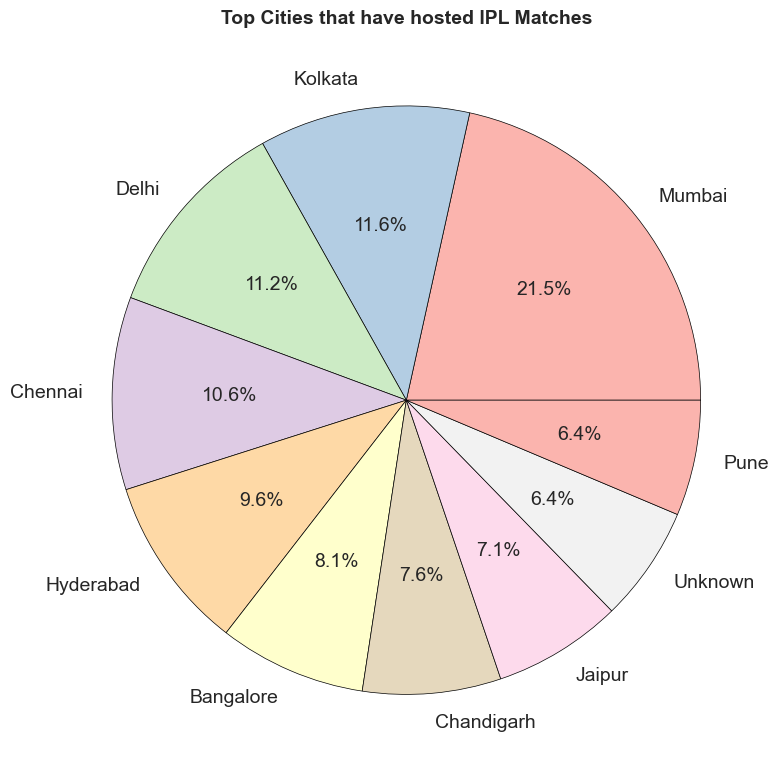

In [76]:
top_cities = matches['city'].value_counts().reset_index(name='Match Count')[:10]

# Choose a visually distinct and soft color palette
colors = sns.color_palette("Pastel1", 10)  # Alternatives: "Set2", "tab10", "Paired", "Spectral"

# Plotting the pie chart
plt.figure(figsize=(8,8))
plt.pie(top_cities['Match Count'], 
        labels=top_cities['city'], 
        colors=colors,
        autopct='%1.1f%%', 
        wedgeprops=dict(edgecolor='black'))

plt.title('Top Cities that have hosted IPL Matches', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


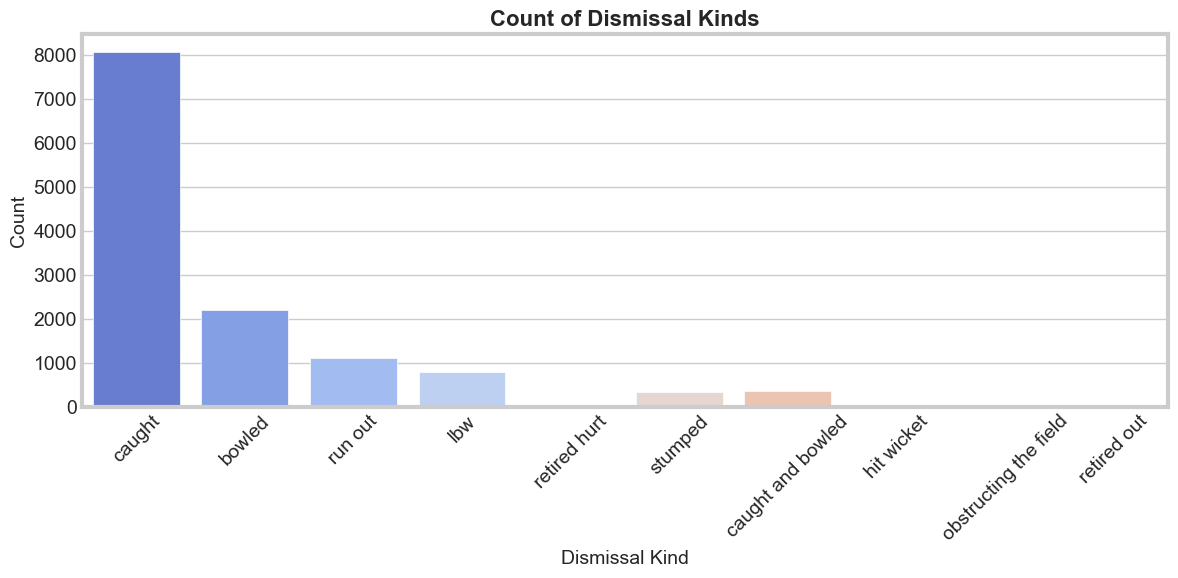

In [78]:
plt.figure(figsize=(12,6))

# Gradient-based palette
palette = sns.color_palette("coolwarm", len(deliveries['dismissal_kind'].value_counts()))

sns.countplot(
    x='dismissal_kind',
    data=deliveries,
    hue='dismissal_kind',
    palette=palette,
    dodge=False,
    legend=False
)

plt.title('Count of Dismissal Kinds', fontsize=16, fontweight='bold')
plt.xlabel('Dismissal Kind', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Top 10 Best Fielders

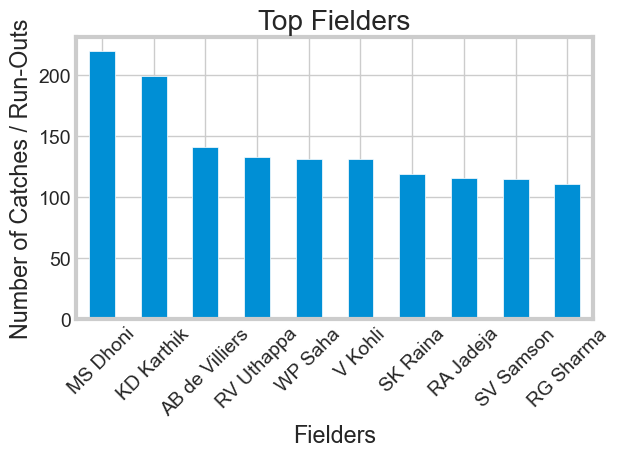

In [81]:
deliveries['fielder'].value_counts()[:10].plot(kind='bar')
plt.title('Top Fielders')
plt.xlabel('Fielders')
plt.ylabel('Number of Catches / Run-Outs')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

#### Analysis Over by Over

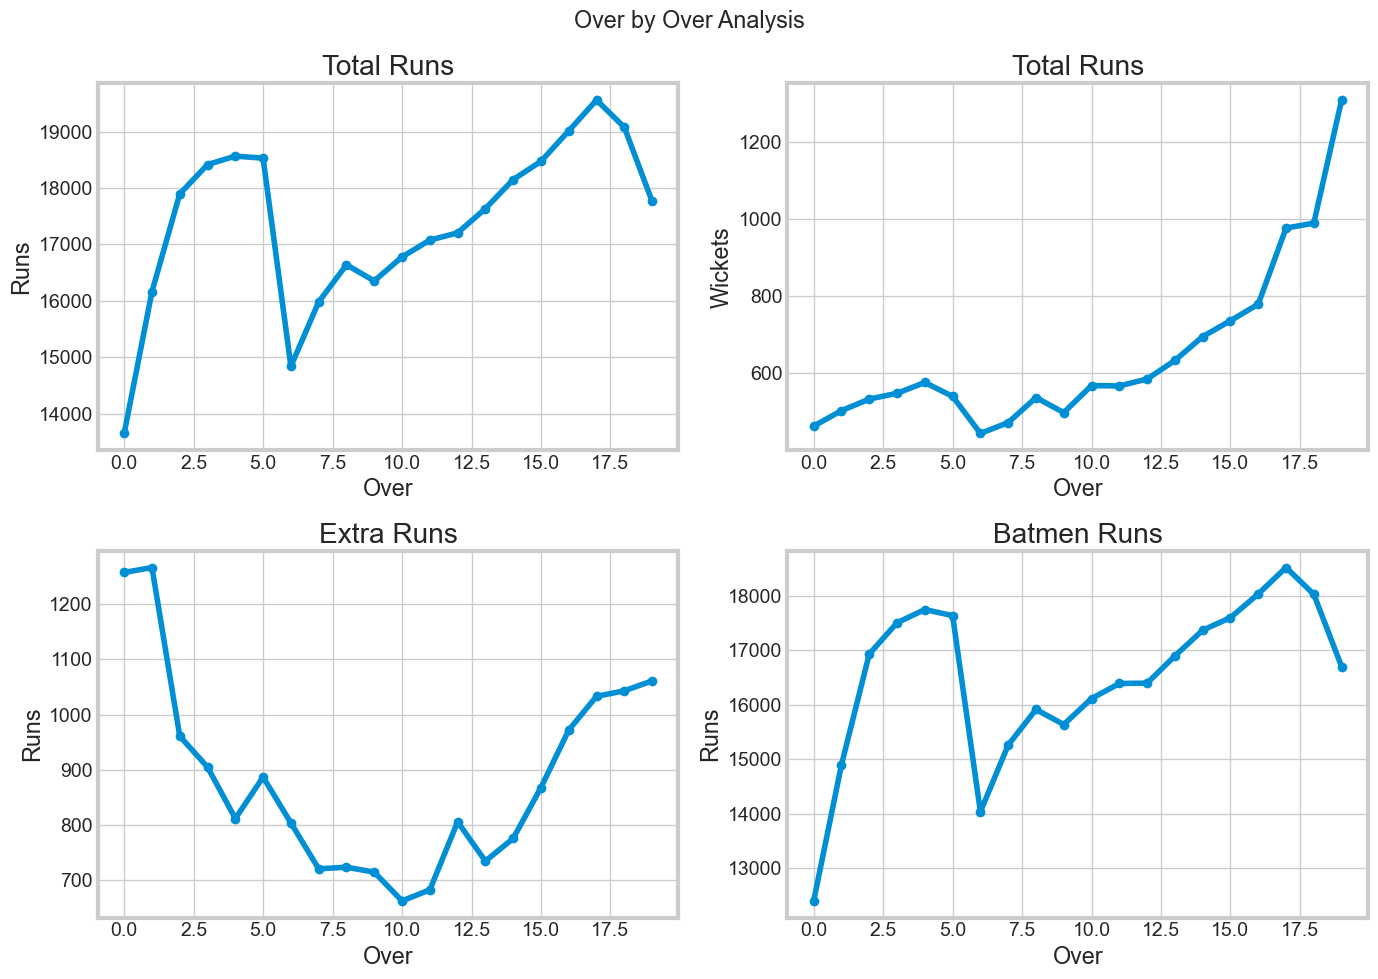

In [84]:
over_summary = deliveries.groupby('over')[['total_runs','is_wicket','extra_runs','batsman_runs']].sum()

fig, axes = plt.subplots(2,2,figsize=(14,10))
fig.suptitle('Over by Over Analysis')


axes[0,0].plot(over_summary.index,over_summary['total_runs'],marker='o')
axes[0,0].set_title('Total Runs')
axes[0,0].set_xlabel('Over')
axes[0,0].set_ylabel('Runs')

axes[0,1].plot(over_summary.index,over_summary['is_wicket'],marker='o')
axes[0,1].set_title('Total Runs')
axes[0,1].set_xlabel('Over')
axes[0,1].set_ylabel('Wickets')

axes[1,0].plot(over_summary.index,over_summary['extra_runs'],marker='o')
axes[1,0].set_title('Extra Runs')
axes[1,0].set_xlabel('Over')
axes[1,0].set_ylabel('Runs')

axes[1,1].plot(over_summary.index,over_summary['batsman_runs'],marker='o')
axes[1,1].set_title('Batmen Runs')
axes[1,1].set_xlabel('Over')
axes[1,1].set_ylabel('Runs')

plt.tight_layout()
plt.show()

#### Toss Decision

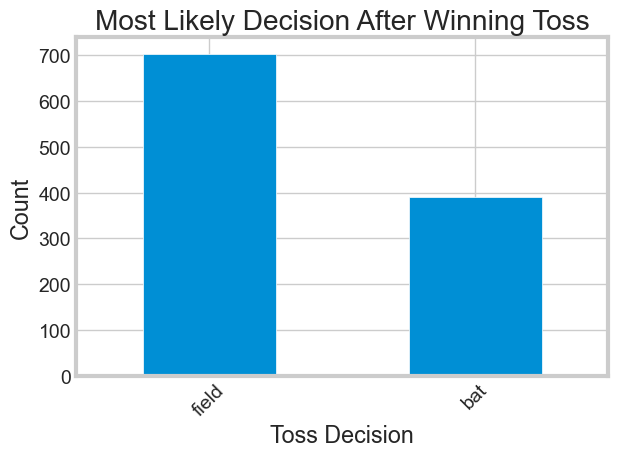

In [87]:
matches['toss_decision'].value_counts().plot(kind='bar')
plt.title('Most Likely Decision After Winning Toss')
plt.xlabel('Toss Decision')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

### Which Batsman Has the Highest Strike Rate (min 300 balls faced)?
### $\text{Strike Rate} = \left( \frac{\text{Total Runs}}{\text{Total Balls Faced}} \right) \times 100$

In [90]:
import pandas as pd

# Calculate total runs and balls faced by each batter
runs = deliveries.groupby('batter')['batsman_runs'].sum()
balls = deliveries[deliveries['extras_type'] != 'wides'].groupby('batter').size()

# Create DataFrame
strike_rate_df = pd.DataFrame({
    'Runs': runs,
    'Balls': balls
})
strike_rate_df['Strike Rate'] = (strike_rate_df['Runs'] / strike_rate_df['Balls']) * 100

# Filter for batters who faced at least 300 balls
strike_rate_df = strike_rate_df[strike_rate_df['Balls'] >= 300]

# Get top 10 by strike rate
top_strike_rate = strike_rate_df.sort_values(by='Strike Rate', ascending=False).head(10)

# Display
print(top_strike_rate[['Runs', 'Balls', 'Strike Rate']].round(2))

                Runs  Balls  Strike Rate
batter                                  
PD Salt          653    372       175.54
AD Russell      2488   1423       174.84
TM Head          772    444       173.87
TH David         659    387       170.28
H Klaasen        993    590       168.31
SP Narine       1534    925       165.84
LS Livingstone   939    578       162.46
N Pooran        1769   1092       162.00
Rashid Khan      545    337       161.72
RM Patidar       799    503       158.85


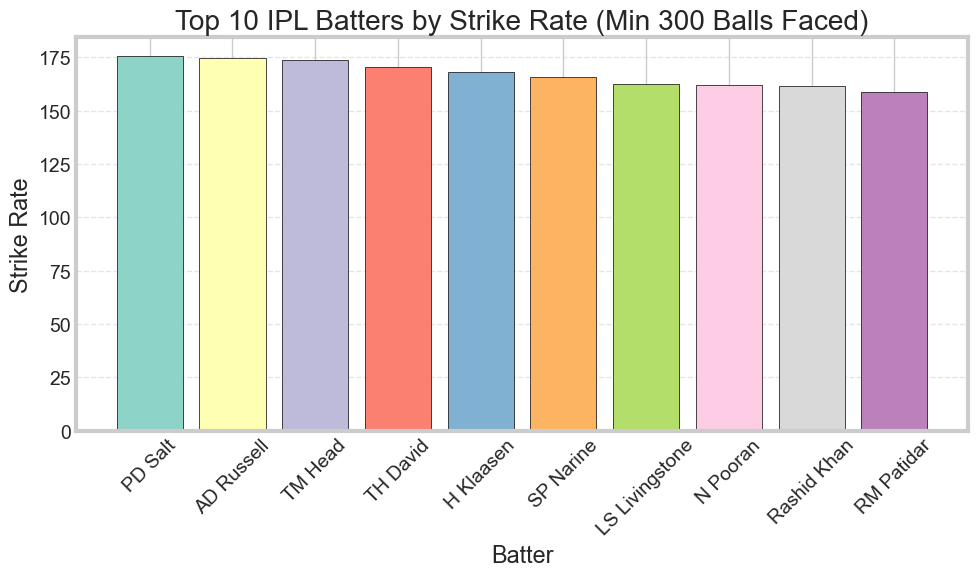

In [115]:
import pandas as pd
import matplotlib.pyplot as plt

# Prepare data
runs = deliveries.groupby('batter')['batsman_runs'].sum()
balls = deliveries[deliveries['extras_type'] != 'wides'].groupby('batter').size()
sr_df = pd.DataFrame({'Runs': runs, 'Balls': balls})
sr_df['Strike Rate'] = (sr_df['Runs'] / sr_df['Balls']) * 100
sr_df = sr_df[sr_df['Balls'] >= 300]
top_sr = sr_df.sort_values('Strike Rate', ascending=False).head(10)

# Reset index
top_sr = top_sr.reset_index()

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(top_sr['batter'], top_sr['Strike Rate'], color=plt.cm.Set3.colors[:10], edgecolor='black')

plt.xlabel("Batter")
plt.ylabel("Strike Rate")
plt.title("Top 10 IPL Batters by Strike Rate (Min 300 Balls Faced)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

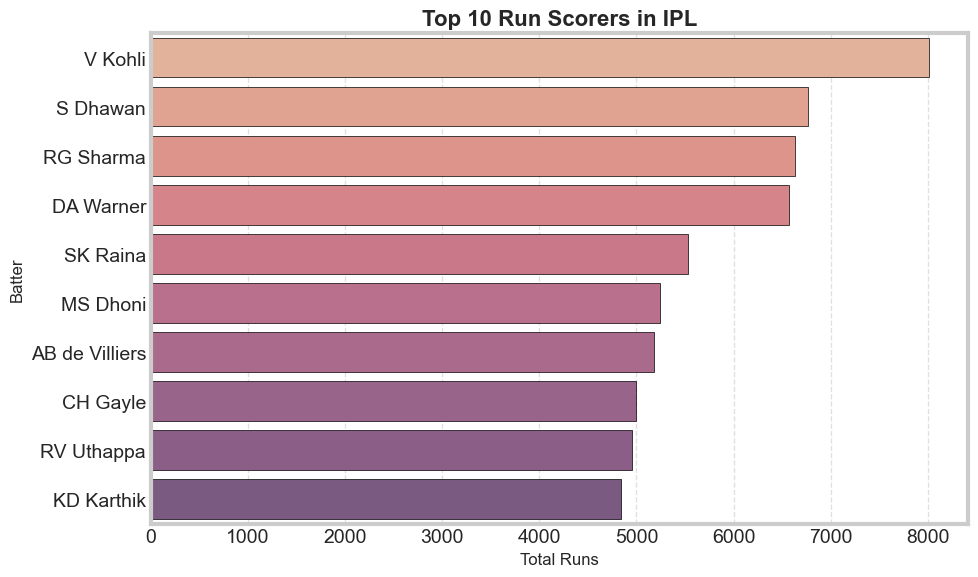

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate top 10 batters
top_batters = deliveries.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).head(10)
top_batters_df = top_batters.reset_index()

plt.figure(figsize=(10, 6))

\
palette = sns.color_palette("flare", n_colors=10)
palette = sns.color_palette([(r*0.8 + 0.2, g*0.8 + 0.2, b*0.8 + 0.2) for r, g, b in palette])  # soften the colors

sns.barplot(
    data=top_batters_df,
    x='batsman_runs',
    y='batter',
    hue='batter',
    palette=palette,
    edgecolor='black',
    legend=False
)

plt.title('Top 10 Run Scorers in IPL', fontsize=16, fontweight='bold')
plt.xlabel('Total Runs', fontsize=12)
plt.ylabel('Batter', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


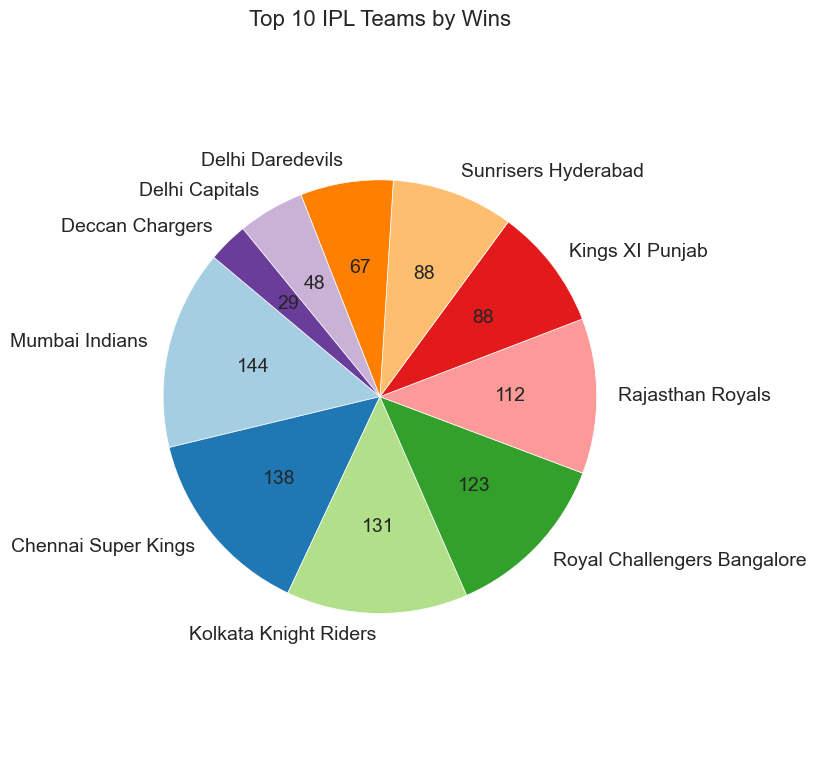

In [109]:
import matplotlib.pyplot as plt

# Get top 10 teams with most wins
top_teams = matches['winner'].value_counts().head(10)

# Function to show actual win counts on pie chart
def absolute_value(val):
    total = sum(top_teams)
    count = int(round(val * total / 100))
    return f'{count}'

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    top_teams,
    labels=top_teams.index,
    autopct=absolute_value,
    startangle=140,
    colors=plt.cm.Paired.colors
)

plt.title('Top 10 IPL Teams by Wins', fontsize=16)
plt.axis('equal')  # Keep the pie chart circular
plt.tight_layout()
plt.show()